# Project: Let's get real-estate!
## Final Report

## Authors | NetID
* Arpan Sutaria | asutar5@uic.edu
* Devesh Patel | dpate320@uic.edu
* Htin Linn Htoo Than | hthan2@uic.edu
* Jay Patel | jpate281@uic.edu
* Kevinkumar Patel | kpate413@uic.edu

## GitHub Link:
https://github.com/A-Sutaria/CS418_Project_FA23

# Project Introduction

This project is more focused towards analyzing the real estate market and figuring out the trends and patterns throughout history. We start by looking the data overall and analyzing it through EDA. Then we came up with our hypothesis that were based off on trends that we see in real world. We used the obtained data to prove or disprove our hypothesis through visualizations. Lastly, we have two machine learning models. One is a predicting model which predicts the value indices of properties. The other is a classifying model that classifies a region's market as hot, stable or cold. This project is essentially brought up with the idea that what kind of things would a property manager look at or consider before getting into the market. Or, what kind of insights would help an existing property manager to make more sound decisions.

# Data - Htin Linn

Our main source of data is Zillow's public dataset available here: https://www.zillow.com/research/data/. There's a lot of data available, more than we need for the scope of this project. Each dataset is an attribute of feature of the property. Some of the major ones we are using are: Zillow Home Value Index (ZHVF), Zillow Home Value Forecast (ZHVF), Days To Pending, Inventory levels, etc.

All of the data is quantitative. As I mentioned earlier, each dataset is a feature in its own. All the datasets are indexed by regionID where regionID can correspond to one of either a metro city, a neighborhood, a ZIP code, a state, etc. For most of the cases, we are using datasets over metro cities. All the datasets are divided over time ranging from 01/31/2000 to 09/30/2023. Most of the data is divided on a monthly basis. Given a name and a date, you can figure out the value (according to the dataset, eg: ZHVI, ZHVF, etc.). 

# Exploratory Data Analysis (EDA) - ALL
The datasets we used for this project mainly consists of numerical values which are prices of different homes over a period of time and variables which are different regions and states. Since our main focus is to compare prices across different variables over a different period of time, we had to make sure our datasets included exactly the type of data we needed and we needed to clean to filter out any missing values.


The 6 main different datasets are The Zillow Home Value Index (ZHVI), the Zillow Home Value Forecast (ZHVF), the Zillow Observed Rent Index (ZORI), For-Sale Inventory, List and Sale Prices, Sales Count, and Price Cuts. Each dataset is also divided into multiple data types across different geography values such as Metro & U.S, State, County, City, Zip Code and Neighbourhood. However, the issue we faced was that not all datasets have the each of the geography value except for Metro & U.S so we decided to mainly use the datasets which have the Metro & U.S values.

We would be plotting 5 graphs of 5 datasets (out of many) that we used. All 5 datasets have the same arrangement. They have the following columns:
* RegionID: ID of the region (region can be metro/neighborhood/ZIP region/etc) they have data about
* SizeRank: Rank of the area they have data about. All the datasets are sorted by the rank in ascending order.
* RegionName: Name of the region (region can metro/neighborhood/ZIP region/etc).
* RegionType: Type of region (region can metro/neighborhood/ZIP region/etc). For example, metro cities have the value "msa", while ZIP regions have the value "ZIP"; states have the value "state", and so on.
* StateName: Shortform of the state name. NOTE: If RegionType = state, then this column would be empty.
* DATES**: This is not a single column but multiple columns. These columns are dates in the format yyyy-mm-dd. The values for these columns is the actual value the dataset is comprised off.

For all the graphs, we are plotting the first entry which is the cumulative of whichever attribute the dataset corresponds to over entire U.S. For example, if it is the ZHVI dataset, then the first value (which always is United States) would be plotted against time to see the trend in the entire US. For a specific region, we would have to find the entry with that specific region (can use pandasql) and then plot it.

In [1]:
# a helper function used across all the EDAs
def get_x_y(dataframe):
    first_row = dataframe.iloc[0]
    x_row = first_row.index[5:].to_numpy()
    y_row = first_row.iloc[5:].to_numpy()

    return [x_row, y_row]

## EDA 1: Zillow Home Value Index (ZHVI)
### (Arpan)
Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure. We used the smoothed version of data. This is a quantitative data spread across time ranging from 01/31/2000 to 09/30/2023. For any given month, you can check up the value index of a given metro city.

Here is the code to generate a plot of the overall ZHVI of properties across the U.S

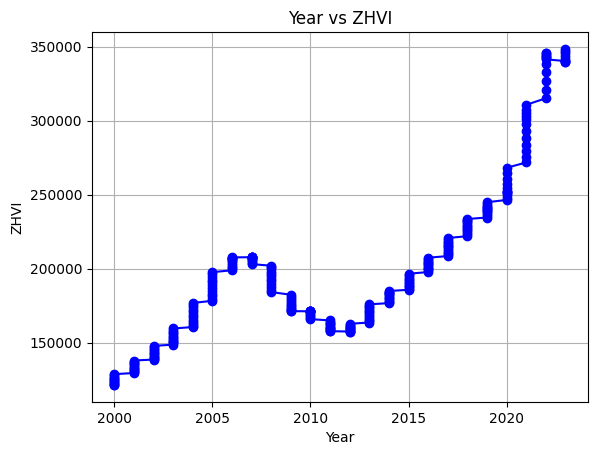

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
zhvi_trends = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Getting the X and Y values that will be plotted
[x_zhvi, y_zhvi] = get_x_y(zhvi_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zhvi]

# Plot the line chart
plt.plot(years, y_zhvi, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('ZHVI')
plt.title('Year vs ZHVI')
plt.grid(True)
plt.show()

As you can see in the graph, the trend of ZHVI is progressively growing indicating that the value index of properties across U.S have continued to rise. This can also imply there was a significant increase in the price of the properties.

## EDA 2: For-Sale Inventory
### (Devesh)
The count of unique listings that were active at any time in a given month. This data is again a quantitative data spread across 03/31/2018 to 09/30/2023. For a given metro city, at any given month, this data can give how many properties were listed for sale during that month in that region.

Here is plot of inventories across the U.S for all available times.

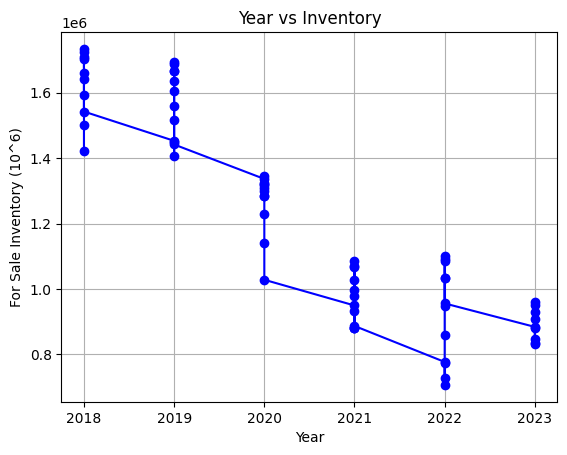

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
fs_inventory_trends = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_fs, y_fs] = get_x_y(fs_inventory_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_fs]

# Plot the line chart
plt.plot(years, y_fs, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('For Sale Inventory (10^6)')
plt.title('Year vs Inventory')
plt.grid(True)
plt.show()

As we can observe, the inventory levels went down progressively. This tells us the there was a decrease in the sales of properties. Practically, we still see people living and population of cities increasing. We can easily infer that there has been a shift from sales of properties to rental properties.

## EDA 3: Zillow Observed Rent Index (ZORI)
### (Htin Linn)
Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock. This quantitative data also follows the same format as the previous datasets. The range for this dataset is from 01/31/2015 to 09/30/2023.

Here is a plot of ZORI across U.S for all available times:

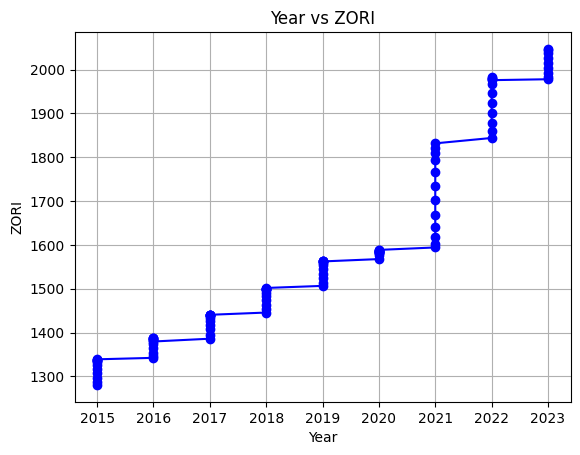

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
zori_trends = pd.read_csv("datasets\Metro_zori_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_zori, y_zori] = get_x_y(zori_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zori]

# Plot the line chart
plt.plot(years, y_zori, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('ZORI')
plt.title('Year vs ZORI')
plt.grid(True)
plt.show()

As we can see, the ZORI has rised overall and that too drastically. One other interesting thing is that it resembles a staircase pattern of rising which means, the changes were sudden. What caused the spikes can be its own study. But one thing we can infer for sure is that there was definitely rise in rental properties which in turn resulted in a higher value index for rental properties.

## EDA 4: Days to Close (Mean)
### (Jay)
Days to Close: Number of days between the listing going pending and the sale date. This quantitative data is ranged across 01/31/2018 to 08/31/2023.

Here is the plot of Days to Close across U.S for the given range of time:

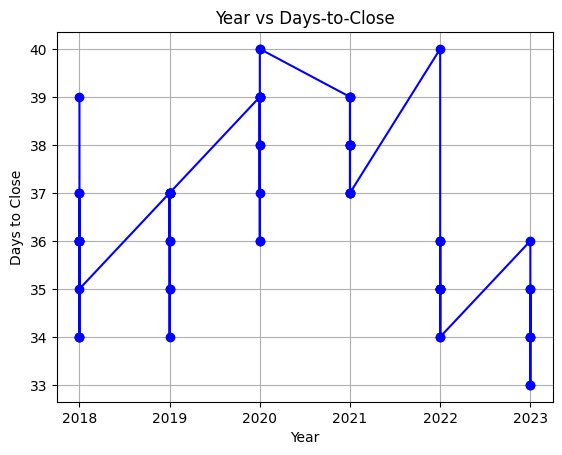

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
days_to_close = pd.read_csv("datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv")

# Getting the X and Y values that will be plotted
[x_dtc, y_dtc] = get_x_y(days_to_close)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_dtc]

# Plot the line chart
plt.plot(years, y_dtc, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Days to Close')
plt.title('Year vs Days-to-Close')
plt.grid(True)
plt.show()

In the graph, we can see that there is no specific pattern. But by looking at Y axis, we can infer that usually it takes approx. 30-40 days for a property to close. We see more values around 37 over the years which might make it the avg number of days it takes for a property to close.

## EDA 5: Sales-to-List Ratio (Mean/Median)
### (Kevin)
Sale-to-List Ratio (mean/median): Ratio of sale vs. final list price. This also is a quantitative data ranging from 01/31/2018 to 08/31/2023 for mean and median both. This might tell us whether there was a change in the negiotiation frame or how frequent it might have become.

Here are two plots (mean and median) to observe those trends.

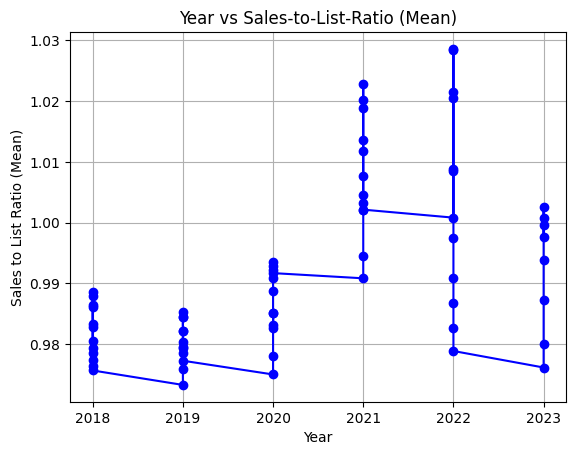

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
sale_to_list_ratio_mean = pd.read_csv("datasets\Metro_mean_sale_to_list_uc_sfrcondo_month.csv")

# Getting the X and Y values that will be plotted
[x_stlr_mean, y_stlr_mean] = get_x_y(sale_to_list_ratio_mean)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_stlr_mean]

# Plot the line chart
plt.plot(years, y_stlr_mean, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Sales to List Ratio (Mean)')
plt.title('Year vs Sales-to-List-Ratio (Mean)')
plt.grid(True)
plt.show()

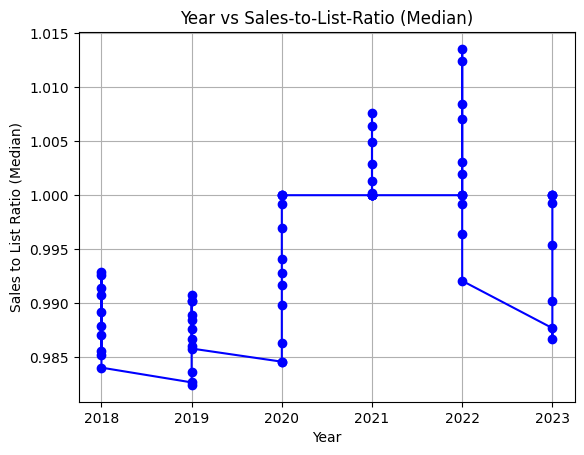

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
sale_to_list_ratio_median = pd.read_csv("datasets\Metro_median_sale_to_list_uc_sfrcondo_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_stlr_median, y_stlr_median] = get_x_y(sale_to_list_ratio_median)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_stlr_median]

# Plot the line chart
plt.plot(years, y_stlr_median, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Sales to List Ratio (Median)')
plt.title('Year vs Sales-to-List-Ratio (Median)')
plt.grid(True)
plt.show()

Both of the graphs almost look similar, except for the time period 2020-2022. Mean suggests a higher Sales-to-List-Ratio for the year 2021. It might imply there were outliers. Less of the differences, more on the trends; we can see that there's not as such a visible pattern. There was a time period when sales-to-list ratio was high, but as of now it has again dropped.

# Visualizations: Arpan

## Visualization 1

### Hypothesis
There is a co-relation between schools and home values in a given area.

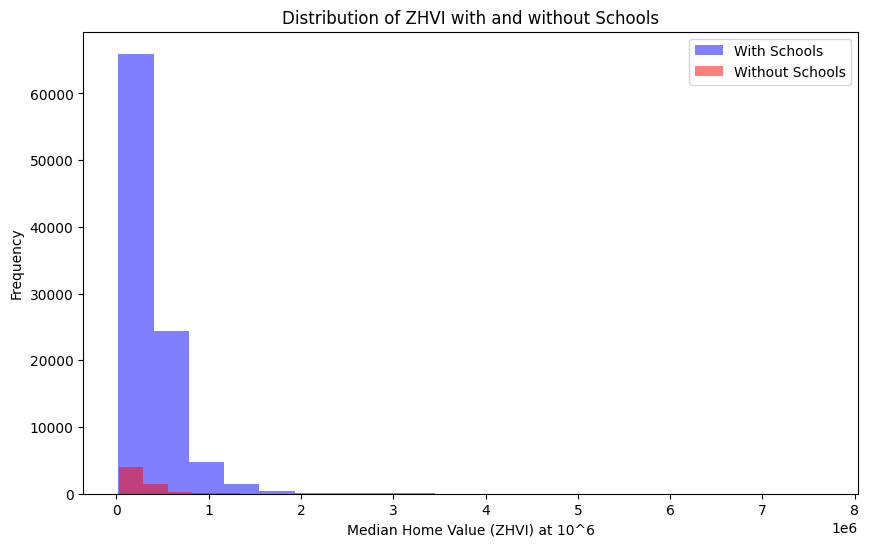

In [8]:
# in case you don't have this library installed
# %pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# Load ZHVI data
zhvi_data = pd.read_csv("datasets\Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zhvi_data = zhvi_data.drop('SizeRank', axis=1)
zhvi_data = zhvi_data.drop('StateName', axis=1)
zhvi_data = zhvi_data.rename(columns={'RegionName': 'ZIP'})  # Rename the 'RegionName' column to 'ZIP' in zhvi_data

# Load school data
school_data = pd.read_excel("datasets\EDGE_GEOCODE_PUBLICSCH_2122.xlsx")

# Creating two groups so that we can compare them on the graph and prove/disprove our hypothesis
zhvi_with_schools = zhvi_data.merge(
    school_data[['ZIP', 'STATE', 'NAME']],
    on='ZIP',
    how='inner'
)

# Create 'zhvi_without_schools' dataframe
zhvi_without_schools = zhvi_data[~zhvi_data['ZIP'].isin(school_data['ZIP'])]

# Select the columns of interest for both dataframes
columns_of_interest = [
    'RegionID', 'ZIP', 'State', 'City', 'Metro', 'CountyName', '2023-09-30'
]

zhvi_with_schools = zhvi_with_schools[columns_of_interest + ['NAME']]  # adding name of the schools for more clarity
zhvi_without_schools = zhvi_without_schools[columns_of_interest]

plt.figure(figsize=(10, 6))
plt.hist(zhvi_with_schools['2023-09-30'], bins=20, alpha=0.5, color='blue', label='With Schools')
plt.hist(zhvi_without_schools['2023-09-30'], bins=20, alpha=0.5, color='red', label='Without Schools')
plt.xlabel('Median Home Value (ZHVI) at 10^6')
plt.ylabel('Frequency')
plt.title('Distribution of ZHVI with and without Schools')
plt.legend()
plt.show()

### Explanation
If we look at the Bar chart plot, it is very obvious that there is a huge difference between the two groups: Houses with schools in the same neighborhood (ZIP Code), and Houses without schools in the same neighborhood (ZIP Code). It is observed that houses in the same ZIP Code region as a school had dramatically high Zillow Home Value Index (ZHVI) as of 09/30/2023 than those of houses in a ZIP Code region with no schools. This proves my hypothesis that there is a co-relation between houses and schools. The conclusion is that houses with schools nearby have a higher ZHVI. 

## Visualization 2
### Hypothesis
Impact of Seasonality on Housing Inventory Levels

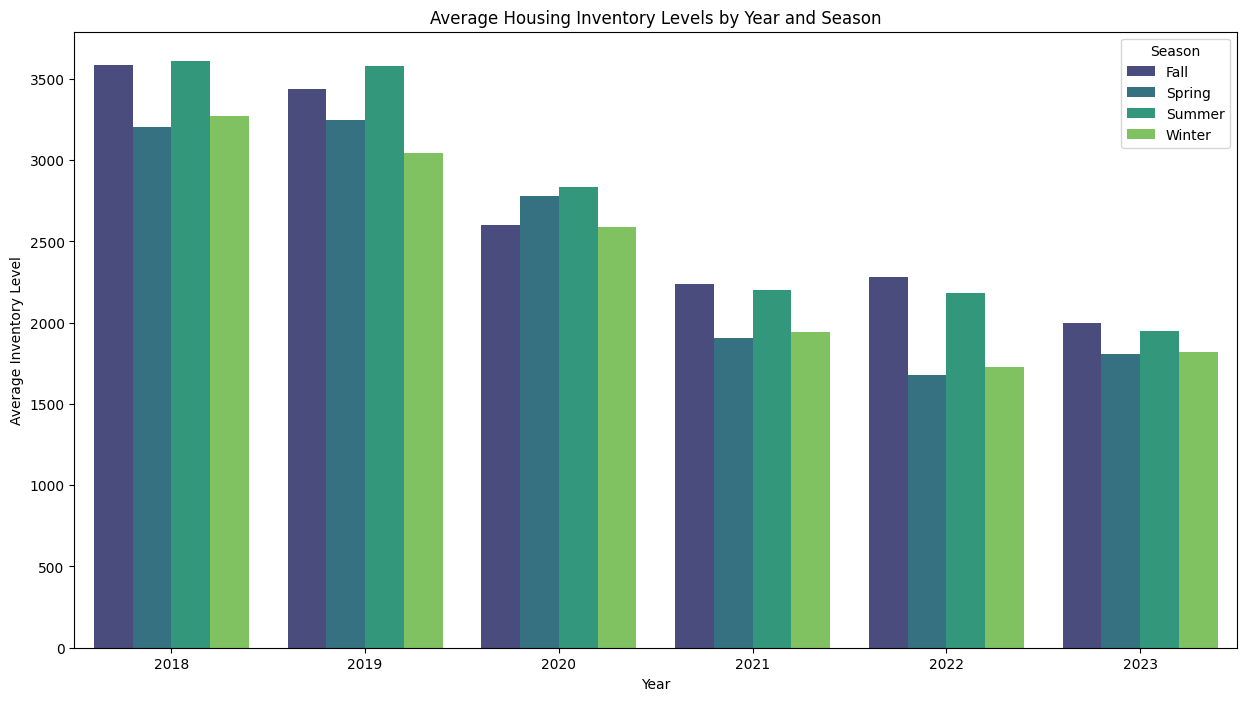

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inventory_data = pd.read_csv('datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv')

# Transforming the dataset from wide to long format
long_format_data = inventory_data.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], 
                            var_name='Date', value_name='Inventory')

# Convert the 'Date' column to datetime format
long_format_data['Date'] = pd.to_datetime(long_format_data['Date'])

# Extract year and month from the date
long_format_data['Year'] = long_format_data['Date'].dt.year
long_format_data['Month'] = long_format_data['Date'].dt.month

# Define a function to categorize months into seasons
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else: # December, January, February
        return 'Winter'

# Apply the function to create a 'Season' column
long_format_data['Season'] = long_format_data['Month'].apply(month_to_season)

# Group data by year and season, then calculate average inventory levels
yearly_seasonal_inventory = long_format_data.groupby(['Year', 'Season'])['Inventory'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Inventory', hue='Season', data=yearly_seasonal_inventory, palette='viridis')
plt.title('Average Housing Inventory Levels by Year and Season')
plt.xlabel('Year')
plt.ylabel('Average Inventory Level')
plt.legend(title='Season')
plt.show()

### Explanation
The analysis of the average housing inventory levels by year and season, as visualized in the bar plot, reveals distinct patterns and trends. A notable observation is the fluctuation in inventory levels across different seasons, with certain seasons consistently exhibiting higher or lower inventory. This seasonal variation is a common characteristic of the housing market, influenced by factors such as weather, buyer and seller behavior, and economic conditions. However, the years encompassing the COVID-19 pandemic stand out, showing unusual trends likely due to the unprecedented impact of the pandemic on the housing market. The pandemic brought about significant changes in buyer preferences, mobility, and economic stability, which are reflected in the inventory levels during this period. These changes underscore the sensitivity of the housing market to external shocks and highlight the importance of considering such extraordinary events in market analysis. The data also suggests regional variations, indicating the influence of local factors on housing inventory. Overall, this analysis provides valuable insights into the housing market dynamics, particularly in the context of extraordinary events like the COVID-19 pandemic.

The chart suggests a trend where inventory levels fluctuate with the seasons. Typically, inventory levels peak in the summer and fall, which could be attributed to the favorable weather and the fact that families prefer to move when it does not disrupt the school year. Conversely, winter often shows the lowest inventory levels, likely due to the holidays and less favorable moving conditions. Over the years, there seems to be a general decline in inventory, which could be indicative of market trends, such as increased demand for housing or reduced new construction. This seasonal pattern is a common phenomenon in real estate markets, reflecting buyers' and sellers' preferences to transact during certain times of the year. The declining trend year-over-year could suggest a tightening market where demand outstrips supply, leading to a decrease in available inventory regardless of the season.

## Visualization (Extra)
### Hypothesis
The for-sale inventory in Chicago, IL, has experienced significant fluctuations over the past five years, possibly indicating varying levels of market tightness and changes in housing demand within the region.

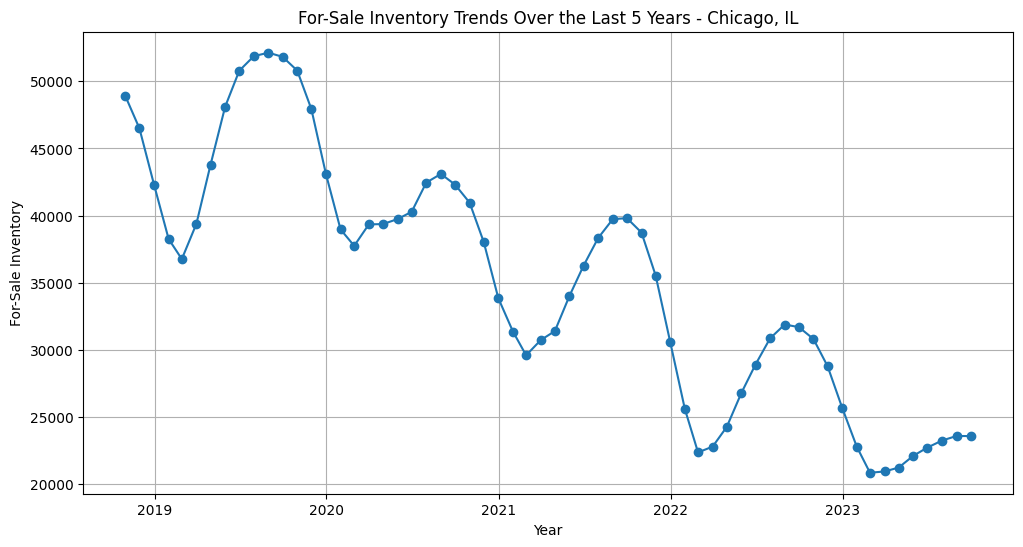

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

inventory_data = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")

# Filter the data for Chicago and for the last 5 years
chicago_inventory_data = inventory_data[inventory_data['RegionName'] == 'Chicago, IL']
# Selecting the last 60 months (5 years) of data
chicago_inventory_5_years = chicago_inventory_data.iloc[:, -60:]

# Transposing the data to make it suitable for plotting
chicago_inventory_transposed = chicago_inventory_5_years.transpose()
chicago_inventory_transposed.columns = ['For-Sale Inventory']
chicago_inventory_transposed.index = pd.to_datetime(chicago_inventory_transposed.index)

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(chicago_inventory_transposed.index, chicago_inventory_transposed['For-Sale Inventory'], marker='o', linestyle='-')
plt.title('For-Sale Inventory Trends Over the Last 5 Years - Chicago, IL')
plt.xlabel('Year')
plt.ylabel('For-Sale Inventory')
plt.grid(True)
plt.show()

### Explanation
Here is the line chart showing the for-sale inventory trends in Chicago, IL, over the last 5 years. This visualization illustrates how the number of available homes for sale has changed month by month during this period, providing insights into market tightness or saturation in the Chicago area.

# Visualizations: Devesh

## Visualization 3 (Improved)
### Hypothesis
There is a correlation between ZHVI and ZORI, suggesting that home values influence rental prices?

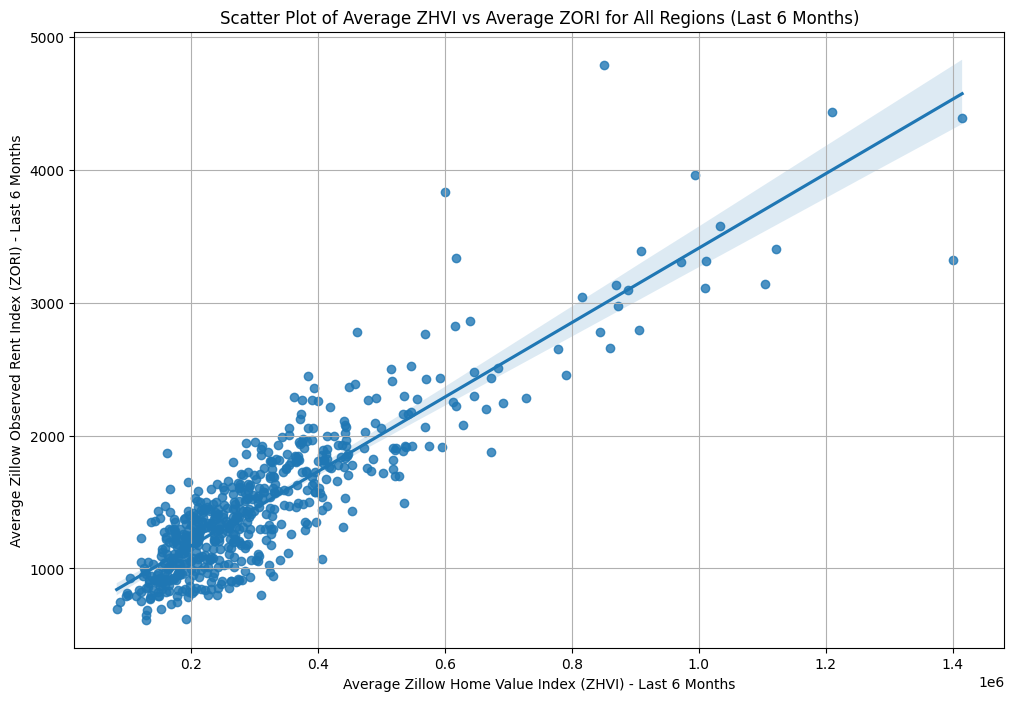

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zori_data = pd.read_csv("datasets\Metro_zori_sm_month.csv")

# Deleting the first row as it is the cumulative of the entire table
zhvi_data = zhvi_data.iloc[1:, :]
zori_data = zori_data.iloc[1:, :]

# Determine the last 6 months' columns for both datasets
last_six_months = zhvi_data.columns[-6:]  # Last 6 columns in the ZHVI dataset

# Calculate the average of the last 6 months for each region
zhvi_avg_6_months = zhvi_data[['RegionName'] + list(last_six_months)].copy()
zhvi_avg_6_months['Avg_ZHVI'] = zhvi_avg_6_months[last_six_months].mean(axis=1)

zori_avg_6_months = zori_data[['RegionName'] + list(last_six_months)].copy()
zori_avg_6_months['Avg_ZORI'] = zori_avg_6_months[last_six_months].mean(axis=1)

# Merging the average data
combined_avg_6_months = pd.merge(zhvi_avg_6_months[['RegionName', 'Avg_ZHVI']], 
                                 zori_avg_6_months[['RegionName', 'Avg_ZORI']], 
                                 on='RegionName')

# Calculating the correlation for the 6 months average
correlation_6_months = combined_avg_6_months[['Avg_ZHVI', 'Avg_ZORI']].corr()

# Taking the top 10 most populous regions for visualization
top_regions_6_months = combined_avg_6_months.nlargest(10, 'Avg_ZHVI')

# Creating the scatter plot for all regions over the last 6 months
plt.figure(figsize=(12, 8))
sns.regplot(x='Avg_ZHVI', y='Avg_ZORI', data=combined_avg_6_months)

plt.title('Scatter Plot of Average ZHVI vs Average ZORI for All Regions (Last 6 Months)')
plt.xlabel('Average Zillow Home Value Index (ZHVI) - Last 6 Months')
plt.ylabel('Average Zillow Observed Rent Index (ZORI) - Last 6 Months')
plt.grid(True)
plt.show()

### Explanation
The scatter plot with a trend line for the top 10 regions by home value index (ZHVI) has been created, showing a strong positive correlation between the Zillow Home Value Index (ZHVI) and the Zillow Observed Rent Index (ZORI). This suggests a significant relationship where, generally, as home values increase, rental prices also tend to increase in these regions.​​ Most of the houses have similar ZHVI which is why we see the cluster at the bottom. It tells us the correlation between the ZHVI of different regions with each other. The best-fit line tells us that the ZHVI and ZORI are directly proportional. The slope is very positive which tells us that an increase in ZHVI will also cause a huge increase in ZORI.

## Visualization 4
### Hypothesis
Over the last five years, the Zillow Home Value Index (ZHVI) in the United States has shown a consistent upward trend, reflecting a robust and growing housing market at the national level.


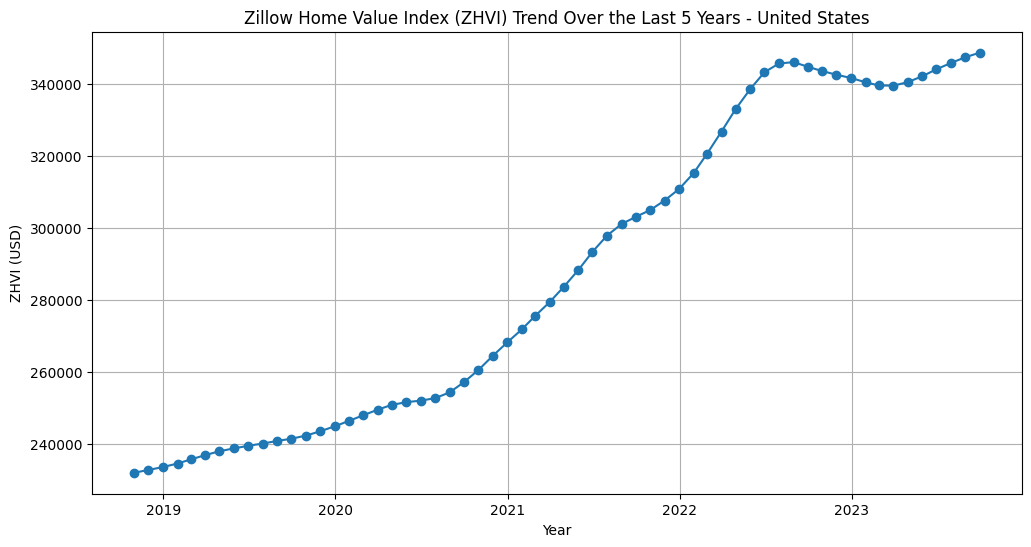

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Filter the data for the United States and for the last 5 years
us_data = zhvi_data[zhvi_data['RegionName'] == 'United States']
# Selecting the last 60 months (5 years) of data
us_data_5_years = us_data.iloc[:, -60:]

# Transposing the data to make it suitable for plotting
us_data_transposed = us_data_5_years.transpose()
us_data_transposed.columns = ['ZHVI']
us_data_transposed.index = pd.to_datetime(us_data_transposed.index)

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(us_data_transposed.index, us_data_transposed['ZHVI'], marker='o', linestyle='-')
plt.title('Zillow Home Value Index (ZHVI) Trend Over the Last 5 Years - United States')
plt.xlabel('Year')
plt.ylabel('ZHVI (USD)')
plt.grid(True)
plt.show()

### Explanation
Here is the line chart showing the trend of the Zillow Home Value Index (ZHVI) for the United States over the last 5 years. This visualization provides a clear view of how the typical home value has changed month by month during this period.

## Visualization (Extra)
### Hypothesis
Nationally, the distribution of 'Days to Pending' for homes has shifted over the last five years, reflecting changes in market dynamics, such as buyer demand and the speed of real estate transactions.

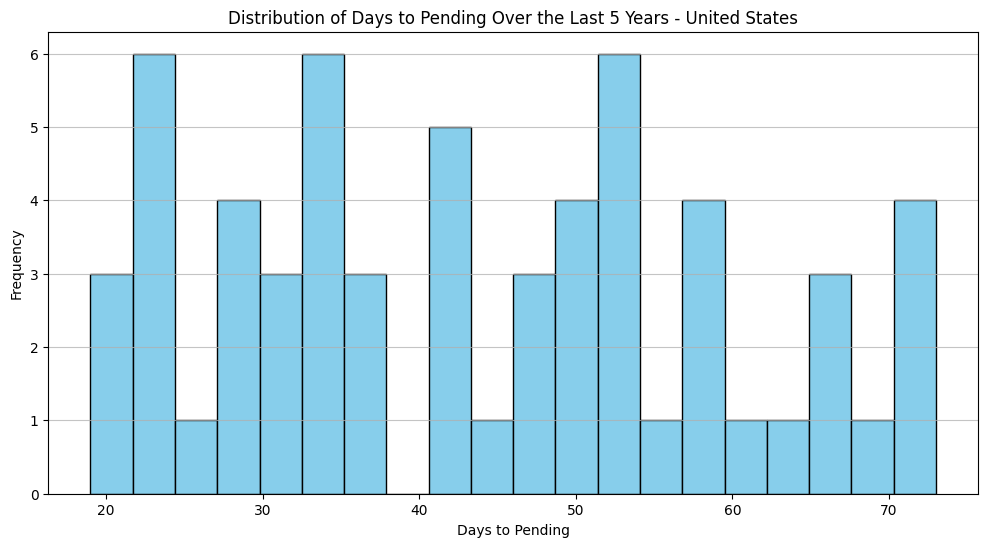

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

days_pending_data = pd.read_csv("datasets\Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv")

# Filter the data for the United States and for the last 5 years
us_days_pending = days_pending_data[days_pending_data['RegionName'] == 'United States']
# Selecting the last 60 months (5 years) of data
us_days_pending_5_years = us_days_pending.iloc[:, -60:]

# Transposing the data to make it suitable for creating a distribution plot
us_days_pending_transposed = us_days_pending_5_years.transpose()
us_days_pending_transposed.columns = ['Days to Pending']
us_days_pending_transposed.index = pd.to_datetime(us_days_pending_transposed.index)

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.hist(us_days_pending_transposed['Days to Pending'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Days to Pending Over the Last 5 Years - United States')
plt.xlabel('Days to Pending')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Explanation
Here's the histogram showing the distribution of 'Days to Pending' for homes in the United States over the last 5 years. This visualization illustrates the frequency of different durations that homes spent on the market before changing to pending status. The distribution gives an overview of how quickly homes have been moving from listing to pending status nationally.

# Visualizations: Htin Linn

## Visualization 5
### Hypothesis
Listings that undergo a price cut stay on the market longer and have a lower Sale-to-List Ratio, suggesting that initial pricing is crucial for a quick sale.

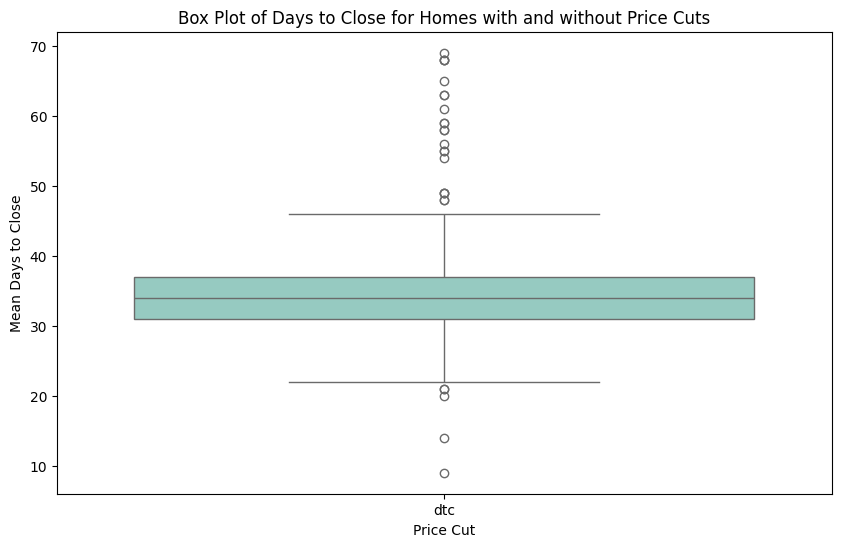

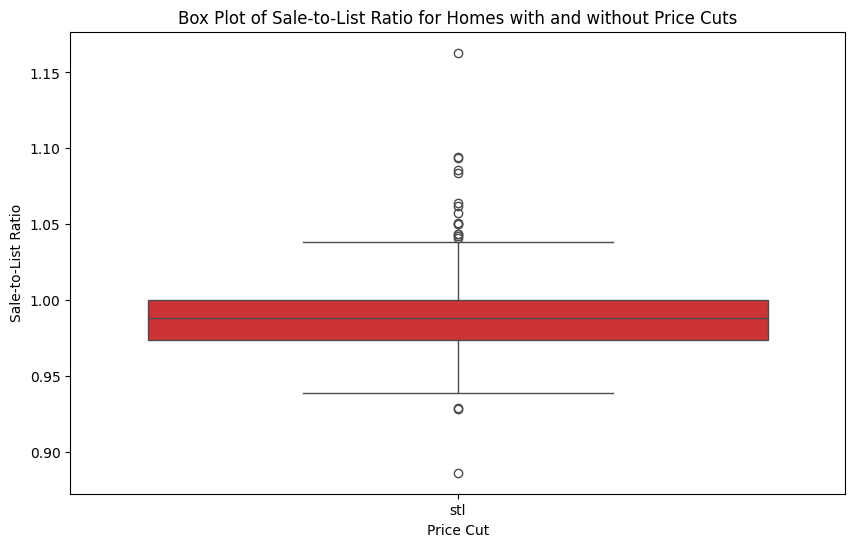

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data
daystoclose = pd.read_csv('datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv')
saletolist = pd.read_csv('datasets\Metro_mean_sale_to_list_uc_sfrcondo_month.csv')

# Most Recent Data
dtc_latest = daystoclose[['RegionName', '2023-08-31']].rename(columns={'2023-08-31': 'dtc'})
stl_latest = saletolist[['RegionName', '2023-08-31']].rename(columns={'2023-08-31': 'stl'})

# Box plots
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dtc_latest, palette="Set3")
plt.title("Box Plot of Days to Close for Homes with and without Price Cuts")
plt.xlabel("Price Cut")
plt.ylabel("Mean Days to Close")
plt.show()

plt.figure(figsize=(10, 6))  
sns.boxplot(data=stl_latest, palette="Set1")
plt.title("Box Plot of Sale-to-List Ratio for Homes with and without Price Cuts")
plt.xlabel("Price Cut")
plt.ylabel("Sale-to-List Ratio")
plt.show()

### Explanation
The first box plot compares 'Days to Close' for homes with and without price cuts, while the second one compares the 'Sale-to-List Ratio' for the same groups. As we can see from the box plots, most of the listings that undergo a price cut stay on the market longer and have a lower Sale-to-List Ratio, suggesting that initial pricing is crucial for a quick sale.

## Visualization 6
### Hypothesis
Price index of rent is only going to increase from year to year

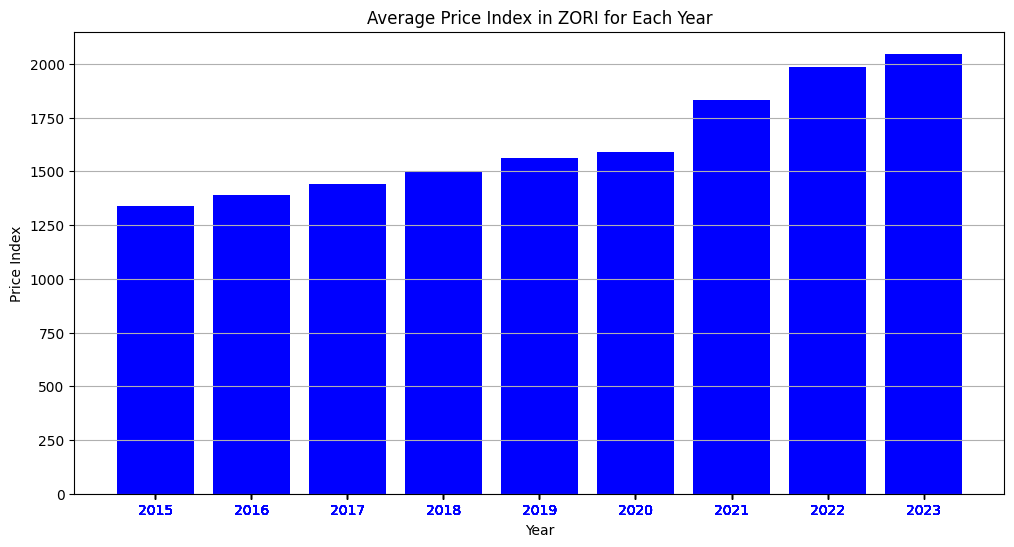

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def get_x_y(dataframe):
    first_row = dataframe.iloc[0]
    x_row = first_row.index[5:].to_numpy()
    y_row = first_row.iloc[5:].to_numpy()
    return [x_row, y_row]

# Dataset
df = pd.read_csv("datasets\Metro_zori_sm_month.csv")
# df.head()
[x_zori, y_zori] = get_x_y(df)

# Years from the date columns
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zori]

# Bar plot to show the average ZORI for each year
plt.figure(figsize=(12, 6))
bars = plt.bar(years, y_zori, color='blue')
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Average Price Index in ZORI for Each Year')
plt.grid(axis='y')
plt.xticks(years, color = 'blue')  # Rotate x-axis labels for better readability
plt.show()

### Explanation
To compare the price index in ZORI dataset split into each year. As we can see from the bar char the index of prices tend to increase year after year which means the price of rent in the future is only going to increase and it is not going to decrease.

# Visualizations: Jay

## Visualization 7
### Hypothesis
Do ZHVI and for-sale inventory levels exhibit seasonal patterns, and if so, how do they vary by region and housing tier?

C:\Users\Arpan\AppData\Local\Temp\ipykernel_19484\811043436.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data_first_five['Date'] = pd.to_datetime(merged_data_first_five['Date'], errors='coerce')


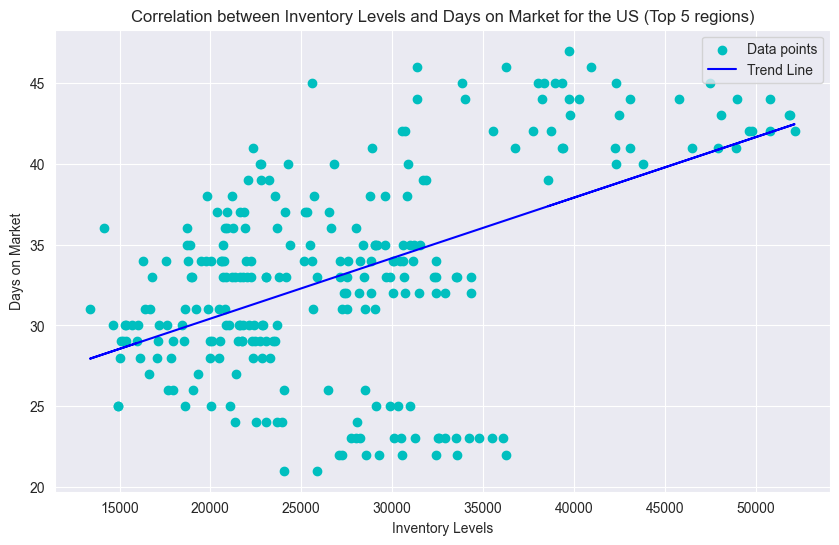

In [16]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Loading the CSV file into a Pandas DataFrame
inventory = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")
days_pending = pd.read_csv("datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv")

# Melt the datasets to convert them from wide to long format
inventory_melted = inventory.melt(id_vars=['RegionID', 'RegionName'], var_name='Date', value_name='Inventory')
days_on_market_melted = days_pending.melt(id_vars=['RegionID', 'RegionName'], var_name='Date', value_name='DaysOnMarket')
first_five_regions = inventory['RegionName'][2:6].tolist()

inventory_first_five = inventory_melted[inventory_melted['RegionName'].isin(first_five_regions)]
days_on_market_first_five = days_on_market_melted[days_on_market_melted['RegionName'].isin(first_five_regions)]
merged_data_first_five = pd.merge(inventory_first_five, days_on_market_first_five, on=['RegionName', 'Date'])

# Convert 'Date' to datetime and sort the data
merged_data_first_five['Date'] = pd.to_datetime(merged_data_first_five['Date'], errors='coerce')

merged_data_first_five = merged_data_first_five.dropna(subset=['Date']).sort_values(['RegionName', 'Date'])
merged_data_first_five.dropna(subset=['Inventory', 'DaysOnMarket'], inplace=True)

# Set style
sns.set_style("darkgrid")

X = merged_data_first_five['Inventory'].values.reshape(-1, 1)
Y = merged_data_first_five['DaysOnMarket'].values

# linear regression model
model = LinearRegression()
model.fit(X, Y)

# values for the trend line
trend_line = model.predict(X)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='c', label='Data points')
plt.plot(X, trend_line, color='blue', label='Trend Line')
plt.title('Correlation between Inventory Levels and Days on Market for the US (Top 5 regions)')
plt.xlabel('Inventory Levels')
plt.ylabel('Days on Market')
plt.legend()
plt.show()

### Explanation
There are two CSV files used for this visualization, Inventory.csv and days_pending.csv. The data from both CSV files is transformed from a wide format to a long format using the melt method. This restructuring makes it easier to manipulate and analyze the data. The code filters out the data for the top five regions in the inventory dataset. It then merges these filtered datasets on the basis of region names and dates, creating a combined dataset that does a comparative analysis between inventory levels and days on the market for these specific regions. The 'Date' column is converted to a datetime format. Any rows with missing values in the 'Date', 'Inventory', or 'DaysOnMarket' columns are dropped. A seaborn style setting is applied just for getting the grid for the plot. The inventory and days on market data are prepared for plotting and regression analysis. A linear regression model is fitted to the data to understand the relationship between inventory levels and the days on market. The code then predicts values for a trend line based on this model, which will be plotted alongside the actual data points. A scatter plot is created to visualize the relationship between the inventory levels and the days on the market for these regions. The trend line from the linear regression analysis is also plotted to illustrate the general direction of the relationship.

We found out that the correlation is positive which suggests that it has been a hot market in the top 5 regions of the United States from 2018 to present. Both low inventory and quick sales could occur simultaneously, indicating high demand and a fast-moving market.

## Visualization 8
### Hypothesis
The U.S. housing market historically favors conditions of low mortgage rates

### Data Sources and Processing:
* Mortgage Data (MORTGAGE30US.csv): This dataset contains mortgage interest rates over time. We’ve filtered it to include data from 2000 to 2021, grouped by month and year, and averaged the rates for each period. We acquired this data from the Federal Reserve bank of St. Louis website.
* CPI Data (US CPI.csv): The Consumer Price Index (CPI) data is used to calculate the inflation rate. We’ve processed this data similarly to the mortgage data, filtering for the same time range and calculating the yearly inflation rate based on changes in the CPI. We acquired this data from Kaggle.com.
* ZHVI Data (ZHVI.csv): This dataset provides the Zillow Home Value Index, a measure of typical home values by region over time. We’ve focused on data for the United States, again narrowing down to the 2000-2021 period and transforming the data for analysis.

### Visualization
The visualization is a heatmap that displays the average Zillow Home Value Index (ZHVI) based on different levels of inflation rates and mortgage interest rates from the year 2000 to 2021 in the United States.

### Creating the visualization
* After merging these datasets, we’ve created a pivot table with inflation rates and mortgage interest rates as dimensions, and the average ZHVI for each combination as values.
* The heatmap then visualizes this pivot table. In this heatmap:
    * The x-axis represents different mortgage interest rates.
    * The y-axis represents different inflation rates.
    * The color intensity in each cell indicates the average ZHVI for the corresponding combination of mortgage and inflation rates.


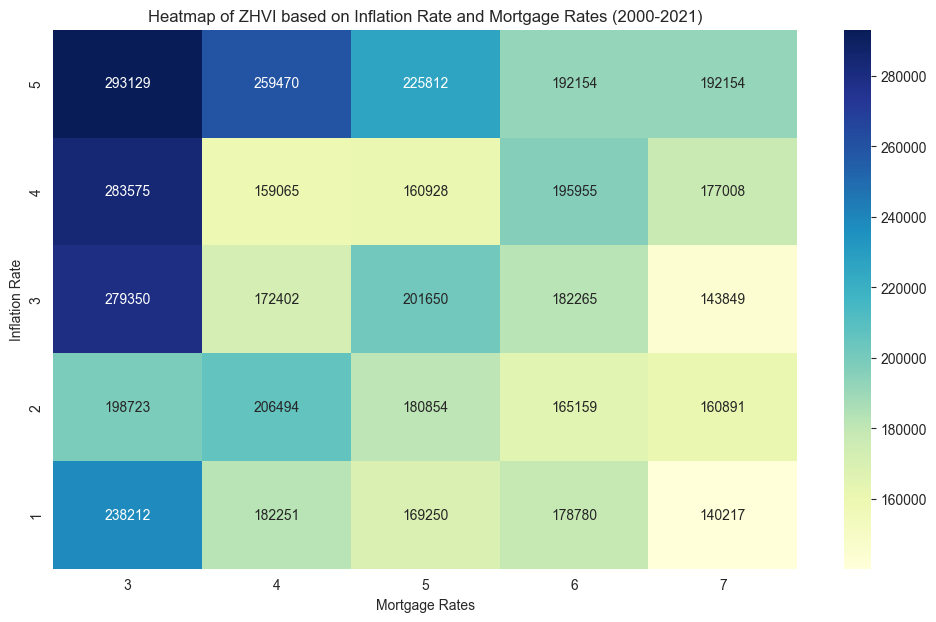

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
mortgage_data = pd.read_csv("datasets\MORTGAGE30US.csv")
cpi_data = pd.read_csv("datasets\\US_CPI.csv")
zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Processing Mortgage Interest Rates data
mortgage_data['DATE'] = pd.to_datetime(mortgage_data['DATE'])
mortgage_data = mortgage_data[(mortgage_data['DATE'].dt.year >= 2000) & (mortgage_data['DATE'].dt.year <= 2021)]
mortgage_data['YearMonth'] = mortgage_data['DATE'].dt.to_period('M')
mortgage_data_grouped = mortgage_data.groupby('YearMonth').mean(numeric_only=True).reset_index()

# Processing US CPI data and calculating Inflation Rate
cpi_data['Yearmon'] = pd.to_datetime(cpi_data['Yearmon'], format='%d-%m-%Y')
cpi_data = cpi_data[(cpi_data['Yearmon'].dt.year >= 2000) & (cpi_data['Yearmon'].dt.year <= 2021)]
cpi_data['YearMonth'] = cpi_data['Yearmon'].dt.to_period('M')
cpi_data['InflationRate'] = cpi_data['CPI'].pct_change(periods=12) * 100
cpi_data_grouped = cpi_data.groupby('YearMonth').mean(numeric_only=True).reset_index()

# Processing ZHVI data for United States
zhvi_data_us = zhvi_data[zhvi_data['RegionName'] == 'United States']
zhvi_data_us = zhvi_data_us.loc[:, '2000-01-31':'2021-12-31']
zhvi_data_us = zhvi_data_us.melt(var_name='Date', value_name='ZHVI')
zhvi_data_us['Date'] = pd.to_datetime(zhvi_data_us['Date'])
zhvi_data_us['YearMonth'] = zhvi_data_us['Date'].dt.to_period('M')
zhvi_data_us_grouped = zhvi_data_us.groupby('YearMonth').mean(numeric_only=True).reset_index()

# Merging the datasets
merged_data = mortgage_data_grouped.merge(cpi_data_grouped, on='YearMonth', how='outer')
merged_data = merged_data.merge(zhvi_data_us_grouped, on='YearMonth', how='outer')
merged_data = merged_data.sort_values(by='YearMonth')

# Dropping unnecessary columns and rows with NaN values
merged_data = merged_data[['YearMonth', 'MORTGAGE30US', 'InflationRate', 'ZHVI']]
merged_data = merged_data.dropna()

# Rounding the mortgage rates and inflation rates to whole numbers
merged_data['MORTGAGE30US'] = merged_data['MORTGAGE30US'].round().astype(int)
merged_data['InflationRate'] = merged_data['InflationRate'].round().astype(int)

merged_data = merged_data[(merged_data['InflationRate'] >= 1) & (merged_data['InflationRate'] <= 5)]
grouped_data = merged_data.groupby(['InflationRate', 'MORTGAGE30US']).agg({'ZHVI': 'mean'}).reset_index()
pivot_data = grouped_data.pivot(index='InflationRate', columns='MORTGAGE30US', values='ZHVI')
pivot_data = pivot_data.interpolate(method='linear', axis=1)
pivot_data = pivot_data.iloc[::-1]

# Plotting the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of ZHVI based on Inflation Rate and Mortgage Rates (2000-2021)")
plt.xlabel("Mortgage Rates")
plt.ylabel("Inflation Rate")
plt.show()

### Explanation
This heatmap helps in understanding the relationship between the housing market (represented by ZHVI), inflation rates, and mortgage interest rates. The heatmap visualization suggests that the U.S. housing market, as measured by the Zillow Home Value Index, historically favors conditions of low mortgage rates, with the highest home values observed when both mortgage rates are low and inflation are high. There is a clear downward trend in home values as mortgage rates increase, indicating that higher borrowing costs tend to depress home prices. The impact of inflation on home values is less clear-cut, with high home values present at both low and moderate inflation rates. The data indicates that high mortgage rates have a uniformly negative impact on home values, regardless of inflation, highlighting the sensitivity of the housing market to lending rates.

In summary, the visualization serves as a tool for analyzing historical trends in the housing market, offering insights into how macroeconomic factors like inflation and mortgage rates might influence home values. It's a valuable resource for economists, investors, policymakers, and home buyers to understand market dynamics and make informed decisions.

## Visualization (Extra)
### Hypothesis
The frequency of price cuts in the United States housing market has varied over the last five years, potentially signaling shifts in seller expectations and market conditions, with sellers adjusting prices more frequently during periods of slower market activity.

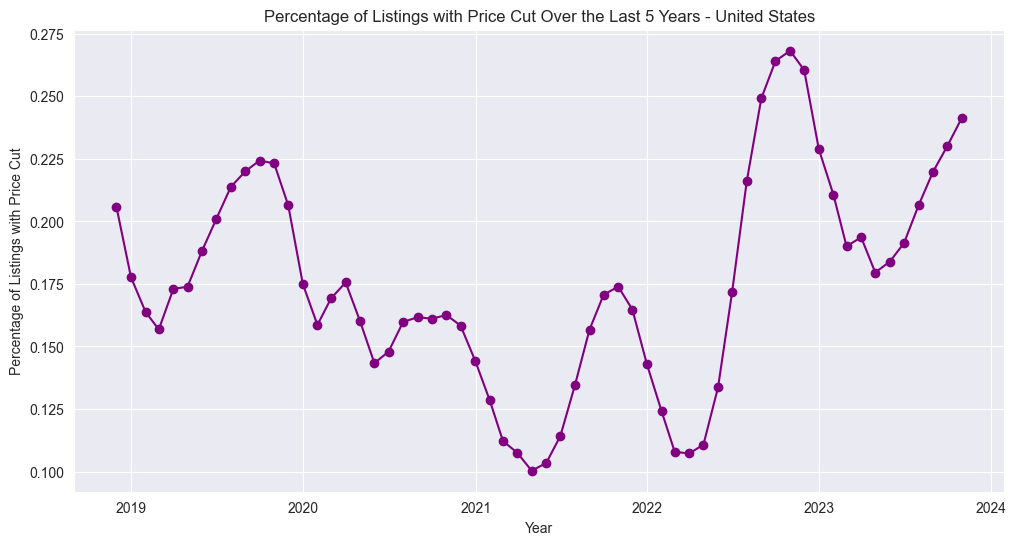

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

price_cut_data = pd.read_csv("datasets\Metro_perc_listings_price_cut_uc_sfrcondo_sm_month.csv")

# Filter the data for the United States and for the last 5 years
us_price_cut = price_cut_data[price_cut_data['RegionName'] == 'United States']
# Selecting the last 60 months (5 years) of data
us_price_cut_5_years = us_price_cut.iloc[:, -60:]

# Transposing the data to make it suitable for creating a bar chart
us_price_cut_transposed = us_price_cut_5_years.transpose()
us_price_cut_transposed.columns = ['Percentage of Listings with Price Cut']
us_price_cut_transposed.index = pd.to_datetime(us_price_cut_transposed.index)

# Creating the line plot for the percentage of listings with price cuts
plt.figure(figsize=(12, 6))
plt.plot(us_price_cut_transposed.index, us_price_cut_transposed['Percentage of Listings with Price Cut'], marker='o', linestyle='-', color='purple')
plt.title('Percentage of Listings with Price Cut Over the Last 5 Years - United States')
plt.xlabel('Year')
plt.ylabel('Percentage of Listings with Price Cut')
plt.grid(True)
plt.show()

### Explanation
Here is the line chart showing the percentage of listings with price cuts in the United States over the last 5 years. This visualization provides a clearer view of how the frequency of price cuts has fluctuated month by month, offering insights into changing market conditions and pricing strategies.

# Visualizations: Kevin

## Visualization 9
### Hypothesis
The 4 bedroom home values are growing at a faster rate than the home values with lesser bedrooms, indicating an increasing disparity in the housing market.

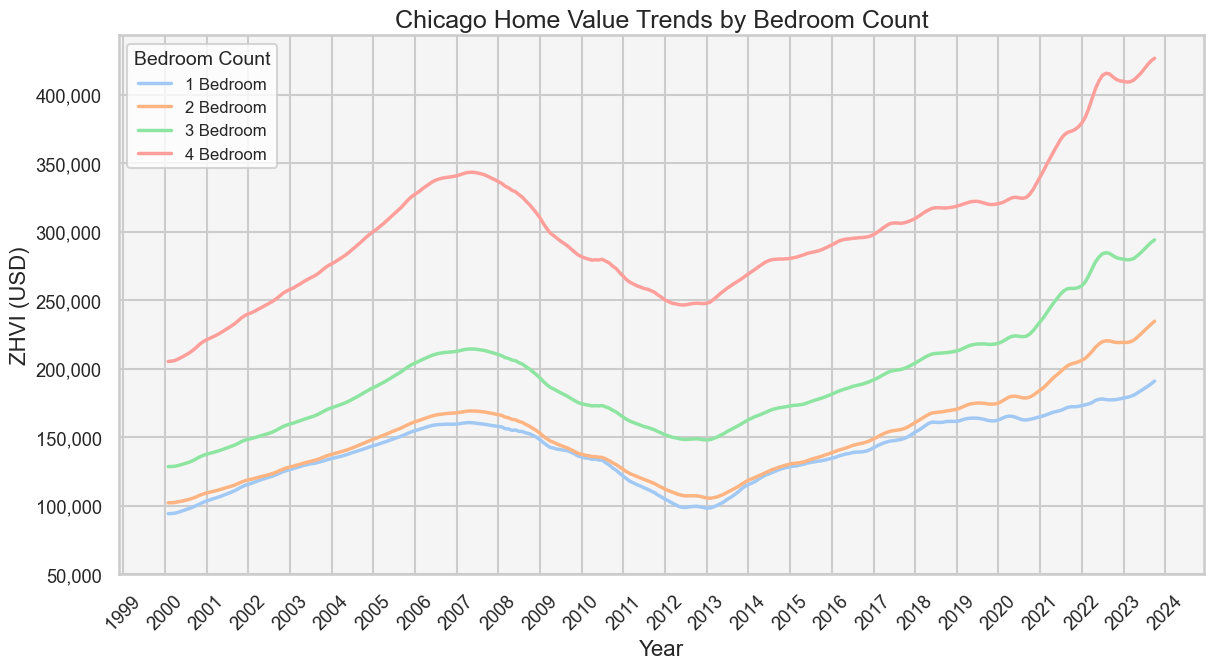

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

# Load your data into pandas DataFrames from CSV files
one_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
two_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
three_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
four_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

chicago_one = one_bed[one_bed['RegionName'] == 'Chicago, IL']
chicago_one_from_2000_to_end = chicago_one.iloc[0][one_bed.columns.get_loc('2000-01-31'):]
chicago_two = two_bed[two_bed['RegionName'] == 'Chicago, IL']
chicago_two_from_2000_to_end = chicago_two.iloc[0][two_bed.columns.get_loc('2000-01-31'):]
chicago_three = three_bed[three_bed['RegionName'] == 'Chicago, IL']
chicago_three_from_2000_to_end = chicago_three.iloc[0][three_bed.columns.get_loc('2000-01-31'):]
chicago_four = four_bed[four_bed['RegionName'] == 'Chicago, IL']
chicago_four_from_2000_to_end = chicago_four.iloc[0][four_bed.columns.get_loc('2000-01-31'):]

# Increase default font size and line width for better readability
sns.set_context('talk', font_scale=0.8)

# Set the Seaborn theme
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the figure and the line plot
plt.figure(figsize=(14, 7))

# Plot the data for each bedroom type
for df, label in [(chicago_one_from_2000_to_end, '1 Bedroom'),
                 (chicago_two_from_2000_to_end, '2 Bedroom'),
                 (chicago_three_from_2000_to_end, '3 Bedroom'),
                 (chicago_four_from_2000_to_end, '4 Bedroom')]:

    # Convert index to datetime
    dates = pd.to_datetime(df.index)

    # Plot with Seaborn
    sns.lineplot(x=dates, y=df.values, label=label, linewidth=2.5)

# Set the x-axis to display years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set y-axis limits and labels
plt.ylim(50000, plt.gca().get_ylim()[1]) # Set minimum y-value to 50000 and maximum to auto
y_max = int(plt.gca().get_ylim()[1] // 50000 * 50000) # Find the nearest number less than max that is divisible by 50000
if y_max < plt.gca().get_ylim()[1]: # If the max y-value is not a multiple of 50000, add another step
    y_max += 50000
plt.yticks(np.arange(50000, y_max, 50000))

# Format the y-axis labels to include commas for thousands
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Chicago Home Value Trends by Bedroom Count', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('ZHVI (USD)', fontsize=16)

# Show legend with a title and increase its font size
plt.legend(title='Bedroom Count', title_fontsize='14', fontsize='12', loc='upper left')

# Set the background color
plt.gca().set_facecolor('#f5f5f5')

# Show the plot
plt.show()

### Explanation
If we look at the graph, the ZHVI of properties with 4 bedrooms seems drastically higher (approx. $75k) than properties with lesser bedrooms. Although, if we look closely, all four lines seems to be changing at approximately the same rate. Even though the ZHVI with 4 bedrooms is higher, the rate is more or less is same as others. So our hypothesis is wrong and disproved from the above visualization. We learn that properties with 4 bedrooms have higher ZHVI, but their rate of change in ZHVI is approximately the same (hence not higher) than the rate of change in ZHVI of properties with lesser bedrooms.

## Visualization 10
### Hypothesis
The volume of property sales and the selling price are higher in spring and summer compared to fall and winter.

C:\Users\Arpan\AppData\Local\Temp\ipykernel_19484\2115184486.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_data['Date'] = pd.to_datetime(us_data['Date'], errors='coerce')


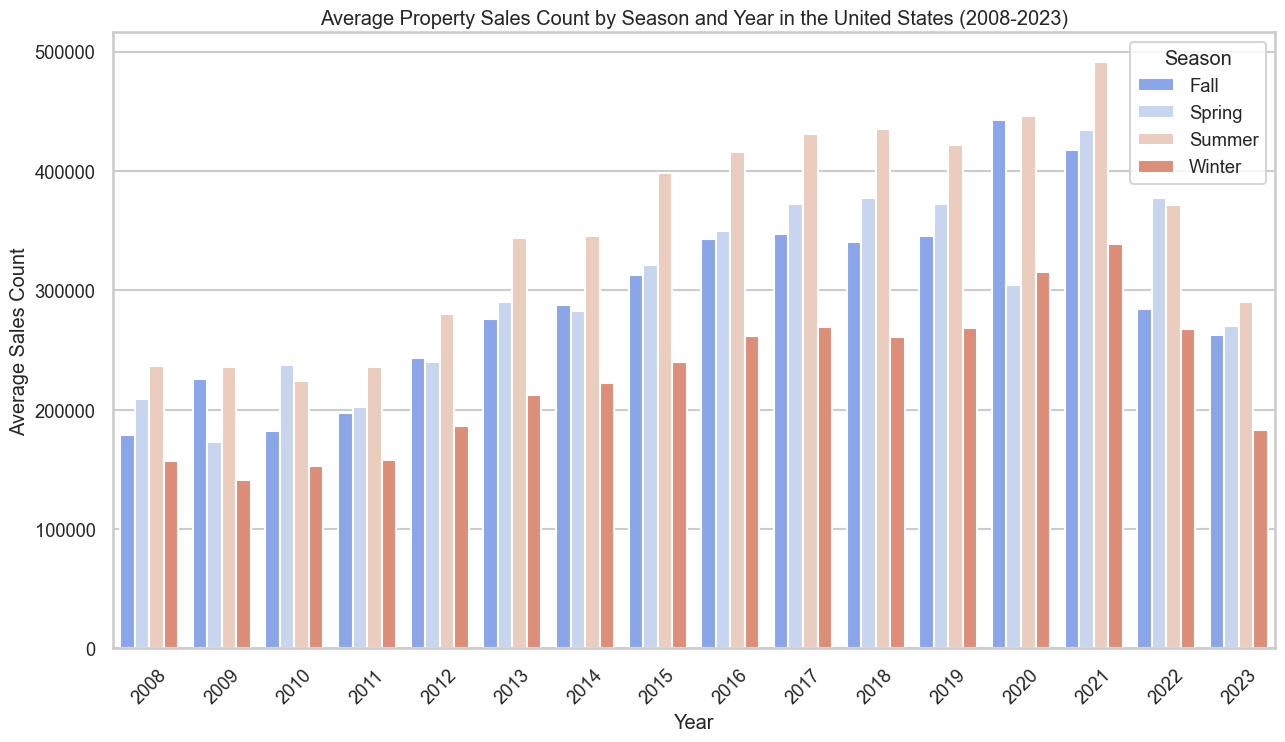

In [20]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'datasets\Metro_sales_count_now_uc_sfrcondo_month.csv'
data = pd.read_csv(file_path)

# Filter for the United States region
us_data = data[data['RegionName'] == 'United States']

# Drop the 'RegionName' column as it's no longer needed
us_data = us_data.drop(columns=['RegionName'])

# Transpose the data to have dates as rows
us_data = us_data.transpose()

# Reset index to make the dates a column
us_data = us_data.reset_index()

# Rename columns for clarity
us_data.columns = ['Date', 'Sales']

# Convert the 'Date' column to datetime
us_data['Date'] = pd.to_datetime(us_data['Date'], errors='coerce')

# Drop rows with NaT in Date column
us_data = us_data.dropna(subset=['Date'])

# Extract year and month from the date
us_data['Year'] = us_data['Date'].dt.year
us_data['Month'] = us_data['Date'].dt.month

# Define a function to categorize months into seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create a 'Season' column
us_data['Season'] = us_data['Month'].apply(get_season)

# Grouping data by year and season
yearly_seasonal_sales = us_data.groupby(['Year', 'Season'])['Sales'].mean().reset_index()

# Plotting with 'coolwarm' palette
plt.figure(figsize=(15, 8))
sns.barplot(data=yearly_seasonal_sales, x='Year', y='Sales', hue='Season', palette='coolwarm')
plt.title('Average Property Sales Count by Season and Year in the United States (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Average Sales Count')
plt.xticks(rotation=45)
plt.show()

### Explanation
Analyzing the "Average Property Sales Count by Season and Year in the United States (2008-2023)" bar plot reveals several insights. Seasonal trends are evident, with spring and summer likely showing higher sales due to favorable weather and family scheduling, while fall and winter typically see a slowdown. Yearly variations reflect the impact of economic conditions, interest rates, and market trends, with specific years highlighting spikes or drops due to events like the 2008 financial crisis or the COVID-19 pandemic. The data may also reveal long-term market trends, such as consistent growth or decline in sales. Seasonal consistency across years can indicate the strength of seasonal influences on the housing market. Comparative analysis within the same year can highlight the most active seasons for property sales. Anomalies or outliers might suggest unique market conditions or data issues, and the impact of significant external events on the housing market can be observed, particularly in years marked by economic or global challenges. This analysis provides a comprehensive overview of market dynamics and consumer behavior in the U.S. housing market over the span of 15 years.

## Visualization (Extra)
### Hypothesis
The trends in the sales count, median sale price, and median sale price per square foot of new construction homes in the United States over the past five years indicate evolving market conditions, including changes in consumer demand, construction costs, and the overall health of the new construction sector.

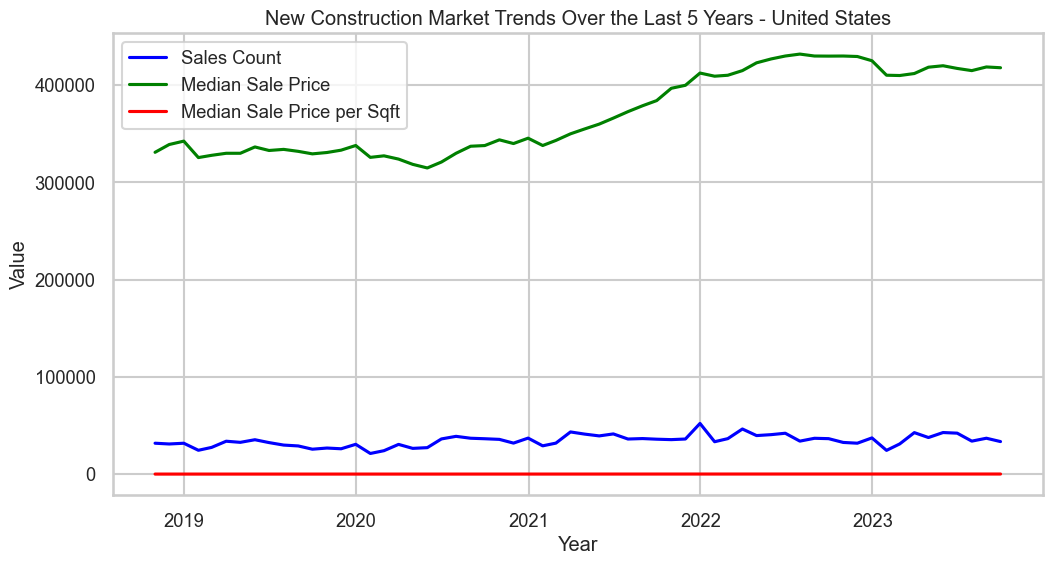

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

new_con_sales_count = pd.read_csv("datasets\Metro_new_con_sales_count_raw_uc_sfrcondo_month.csv")
new_con_median_sale_price = pd.read_csv("datasets\Metro_new_con_median_sale_price_uc_sfrcondo_month.csv")
new_con_median_sale_price_sqft = pd.read_csv("datasets\Metro_new_con_median_sale_price_per_sqft_uc_sfrcondo_month.csv")


# Filter and extract data for the United States for the last 5 years (60 months)
us_sales_count = new_con_sales_count[new_con_sales_count['RegionName'] == 'United States'].iloc[:, -60:]
us_median_sale_price = new_con_median_sale_price[new_con_median_sale_price['RegionName'] == 'United States'].iloc[:, -60:]
us_median_sale_price_sqft = new_con_median_sale_price_sqft[new_con_median_sale_price_sqft['RegionName'] == 'United States'].iloc[:, -60:]

# Transposing the data for easier plotting
us_sales_count_transposed = us_sales_count.transpose()
us_median_sale_price_transposed = us_median_sale_price.transpose()
us_median_sale_price_sqft_transposed = us_median_sale_price_sqft.transpose()

# Setting the index as datetime for plotting
us_sales_count_transposed.index = pd.to_datetime(us_sales_count_transposed.index)
us_median_sale_price_transposed.index = pd.to_datetime(us_median_sale_price_transposed.index)
us_median_sale_price_sqft_transposed.index = pd.to_datetime(us_median_sale_price_sqft_transposed.index)

# Renaming columns for clarity
us_sales_count_transposed.columns = ['Sales Count']
us_median_sale_price_transposed.columns = ['Median Sale Price']
us_median_sale_price_sqft_transposed.columns = ['Median Sale Price per Sqft']

# Creating the combined line plot
plt.figure(figsize=(12, 6))

plt.plot(us_sales_count_transposed.index, us_sales_count_transposed['Sales Count'], label='Sales Count', color='blue')
plt.plot(us_median_sale_price_transposed.index, us_median_sale_price_transposed['Median Sale Price'], label='Median Sale Price', color='green')
plt.plot(us_median_sale_price_sqft_transposed.index, us_median_sale_price_sqft_transposed['Median Sale Price per Sqft'], label='Median Sale Price per Sqft', color='red')

plt.title('New Construction Market Trends Over the Last 5 Years - United States')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Explanation
* Sales Count (Blue Line): Represents the number of new construction homes sold each month.
* Median Sale Price (Green Line): Shows the median sale price of new construction homes each month.
* Median Sale Price per Sqft (Red Line): Indicates the median sale price per square foot for new construction homes each month.

# Machine Learning Analysis

## ML Analysis 1 (Devesh, Updated)
### ML Use Case
Develop a predictive model that forecasts home values (ZHVI) based on various features such as location, home size, number of bedrooms, and historical trends. This is a regression problem where the target variable is continuous.

### Updates
* Improved the model overall
* Made it interactive by taking in user inputs
* Made it modular by allowing user to modify the parameters to tune the model

In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
model_data_numeric = zhvi_data.select_dtypes(include=[np.number])
model_data_imputed = imputer.fit_transform(model_data_numeric)
model_data_imputed_df = pd.DataFrame(model_data_imputed, columns=model_data_numeric.columns)

# User input for prediction and split ratio
months_ahead = int(input("Enter the number of months ahead to predict: "))
test_size_ratio = float(input("Enter the test size ratio (between 0 and 1): "))
scale_data = input("Do you want to scale the data? (yes/no): ").lower() == 'yes'

# Prepare the data for modeling
X = model_data_imputed_df.iloc[:, :-months_ahead-1].values
y = model_data_imputed_df.iloc[:, -months_ahead-1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, shuffle=False)

# Scale the features if chosen
if scale_data:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Initialize and train the model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gbr = gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"MAE: {mae_gbr}, RMSE: {rmse_gbr}, R2 Score: {r2_gbr}")

MAE: 6368.738727783637, RMSE: 48118.76936817507, R2 Score: 0.9264276059640557


## ML Analysis 2 (Arpan)
### ML Use Case
Classify regional housing markets as "hot," "stable," or "cold" based on current market indicators such as Days to Pending, Inventory Levels, Sale-to-List Ratio, and historical ZHVI trends. This is a classification problem where the target variable is categorical.

#### 1. Data Acquisition

In [23]:
# Import necessary libraries
import pandas as pd

# Would be looking at four features specifically
# [Days_to_Pending, Inventory_Levels, Sale_to_List_Ratio, ZHVI_Trends, Market_Temperature (Target/Label)]
days_to_pending = pd.read_csv("datasets\Metro_med_doz_pending_uc_sfrcondo_sm_month.csv")
inventory_levels = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")
sale_to_list_ratio = pd.read_csv("datasets\Metro_median_sale_to_list_uc_sfrcondo_sm_month.csv")
zhvi_trends = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
sales_count = pd.read_csv("datasets\Metro_sales_count_now_uc_sfrcondo_month.csv")

#### 2. Data Cleaning

In [24]:
# Would be cleaning out data and making it balanced.
# Firstly considering the same time for data.
# ZHVI has more data than other data sets. So we would be not considering a lot of columns from that dataframe.
# We want to consider data from '2018-03-31' to '2023-09-30' (Undersampling)
# inventory_levels end at '2023'08'31', so need to impute values for that column
date_range = pd.date_range(start='2018-03-31', end='2023-09-30', freq='M')

# Cleaning days_to_pending
days_to_pending = days_to_pending.drop('SizeRank', axis=1)
days_to_pending = days_to_pending[days_to_pending['RegionName'] != 'United States']
# print("days_to_pending")
# print(days_to_pending.columns)  # all columns (allegedly across all dataframes)

# Cleaning inventory_levels
inventory_levels = inventory_levels.drop('SizeRank', axis=1)
inventory_levels = inventory_levels[inventory_levels['RegionName'] != 'United States']
# Imputing data in inventory_levels
# Calculate the median of the existing values in the DataFrame for the '2023-09-30' column
column_index_i_l = inventory_levels.columns.get_loc('2018-03-31') # Find the index of the '2018-03-31' column
median_value = inventory_levels.iloc[:, column_index_i_l:-1].median(axis=1)  # column_index_i_l represents the index of the '2018-03-31' column
inventory_levels['2023-09-30'] = median_value  # Add the '2023-09-30' column and impute placeholder values (e.g., 0) for now
# print(days_to_pending.columns == inventory_levels.columns) # [... True ...]

# Cleaning sale_to_list_ratio
sale_to_list_ratio = sale_to_list_ratio.drop('SizeRank', axis=1)
sale_to_list_ratio = sale_to_list_ratio[sale_to_list_ratio['RegionName'] != 'United States']
# Imputing data in sale_to_list_ratio
# Calculate the median of the existing values in the DataFrame for the '2023-09-30' column
column_index_s_t_l = sale_to_list_ratio.columns.get_loc('2018-03-31') # Find the index of the '2018-03-31' column
median_value = sale_to_list_ratio.iloc[:, column_index_s_t_l:-1].median(axis=1)  # column_index_s_t_l represents the index of the '2018-03-31' column
sale_to_list_ratio['2023-09-30'] = median_value  # Add the '2023-09-30' column and impute placeholder values (e.g., 0) for now
# print("\nsale_to_list_ratio")
# print(inventory_levels.columns == sale_to_list_ratio.columns)  # [... True ...]

# Cleaning zhvi_trends
zhvi_trends = zhvi_trends.drop('SizeRank', axis=1)
zhvi_trends = zhvi_trends[zhvi_trends['RegionName'] != 'United States']
zhvi_trends = zhvi_trends[['RegionID', 'RegionName', 'RegionType', 'StateName'] + date_range.strftime('%Y-%m-%d').tolist()]
# print("\nzhvi_trends")
# print(sale_to_list_ratio.columns == zhvi_trends.columns)  # [... True ...]

# Cleaning sales_count
sales_count = sales_count.drop('SizeRank', axis=1)
sales_count = sales_count[sales_count['RegionName'] != 'United States']
sales_count = sales_count[['RegionID', 'RegionName', 'RegionType', 'StateName'] + date_range.strftime('%Y-%m-%d').tolist()]
# print(zhvi_trends.columns == sales_count.columns)  # [... True ...]

#### 3. Data Processing
Creating another dataframe market_temperature which would be our Target label market temperature determines whether the market is hot/stable/cold. In real world it is based on a lot of features, but for this project we are only considering two features to determine market temperature: sales count and inventory levels.

$ market\_temperature = sales\_count / inventory\_levels $

* If low inventory yet more sales, implies there's more demand in the market, hence the market is 'hot'.
* If moderate inventory and moderate sales, implies the market is 'stable'.
* If high inventory yet less sales, implies there's less demand in the market, hence the market is'cold'

In [25]:
# Now that we have sales_count and inventory_levels, we can create market_temperature
# Define the common columns for merging
common_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName']

# Merge the dataframes on the common columns
market_temperature = pd.merge(sales_count, inventory_levels, on=common_columns, suffixes=('_sales', '_inventory'))

# Iterate over the date columns to calculate market temperature
for column in sales_count.columns.difference(common_columns):
    market_temperature[column] = market_temperature[f"{column}_sales"] / market_temperature[f"{column}_inventory"]

# Drop the redundant columns
market_temperature = market_temperature.drop(market_temperature.filter(like='_sales').columns, axis=1)
market_temperature = market_temperature.drop(market_temperature.filter(like='_inventory').columns, axis=1)

# Now we have the market_temperature in values
# market_temperature.head(5)

# Define the mapping function
def map_to_category(value):
    if pd.notna(value):
        if value <= 0.333333:
            return 'cold'
        elif value <= 0.666666:
            return 'stable'
        else:
            return 'hot'
    return value

# Apply the mapping function to convert decimal values to categories
market_temperature_categorical = market_temperature.copy()
market_temperature_categorical.iloc[:, 4:] = market_temperature.iloc[:, 4:].apply(lambda x: x.map(map_to_category))

#### 4. Machine Learning (Decision Tree)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features: [Days_to_Pending, Inventory_Levels, Sale_to_List_Ratio, ZHVI_Trends]
X = market_temperature[['2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
                        '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
                        '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
                        '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
                        '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
                        '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
                        '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
                        '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
                        '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
                        '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
                        '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
                        '2023-09-30']]

# Target variable: Market_Temperature (categorical)
y = market_temperature_categorical['2023-09-30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        cold       1.00      1.00      1.00        22
      stable       1.00      1.00      1.00         1

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



## ML Analysis 3 (Htin Linn)
### ML Use Case
Building up on his 2nd visualization: To compare the price index in ZORI dataset split into each year. As we can see from the bar char the index of prices tend to increase year after year which means the price of rent in the future is only going to increase and it is not going to decrease.

c:\Users\Arpan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


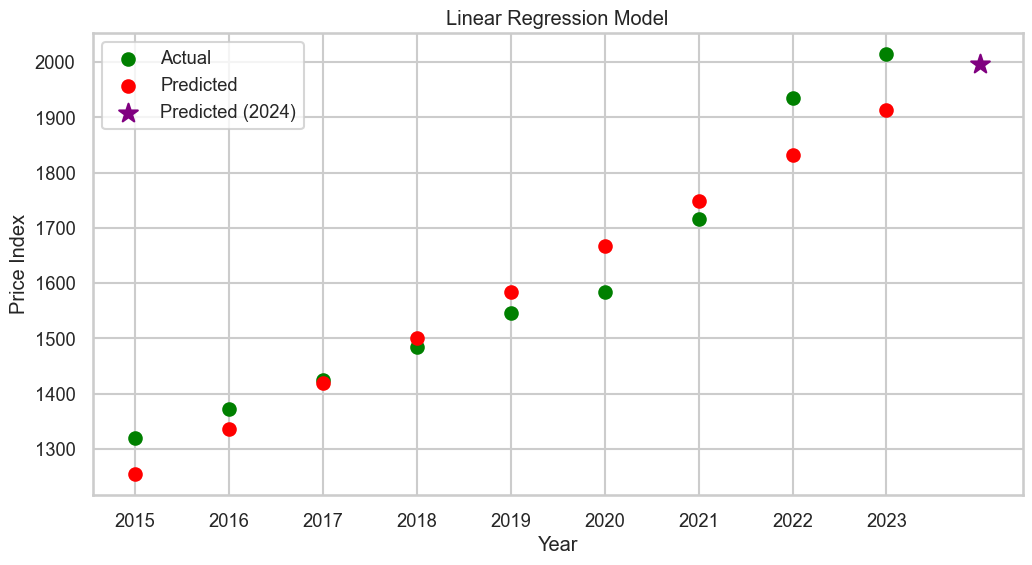

Mean Squared Error: 6058.906356012597
Predicted Price Index for 2024: 1995.589440189884


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataset
df = pd.read_csv("datasets/Metro_zori_sm_month.csv")

def get_x_y(dataframe):
    first_row = dataframe.iloc[0]
    x_row = first_row.index[5:].to_numpy()
    y_row = first_row.iloc[5:].to_numpy()

    return [x_row, y_row]

[x_zori, y_zori] = get_x_y(df)

# Years from the date columns
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zori]

# DataFrame with years and ZORI
data = pd.DataFrame({'Year': years, 'ZORI': y_zori})

# Aggregate data
data = data.groupby('Year')['ZORI'].mean().reset_index()

# Featutres and Target
features = ['Year']
target = 'ZORI'

# Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for entire dataset not including the training set
data['Predicted'] = model.predict(data[features])

# Evaluation
mse = mean_squared_error(y_test, model.predict(X_test))

# Predictions
plt.figure(figsize=(12, 6))

plt.scatter(data['Year'], data['ZORI'], color='green', label='Actual')
plt.scatter(data['Year'], data['Predicted'], color='red', label='Predicted')
plt.scatter([2024], model.predict([[2024]]), color='purple', marker='*', s=200, label='Predicted (2024)')

# Labels
plt.xticks(data['Year'])
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Predict Price Index of ZORI for 2024
future_year = 2024
future_data = pd.DataFrame({'Year': [future_year]})
future_prediction = model.predict(future_data)

print(f'Mean Squared Error: {mse}')
print(f'Predicted Price Index for {future_year}: {future_prediction[0]}')

To test my hypothesis that the price index of rent is only going to increase from year to year I made a Linear Regression model using both training and testing datasets after spliting the data. From the graph, we can concur that there is a linear relationship between Price indexes of each year. The linear regression model also predicts a higher price index than the pervious years including for 2024

## ML Analysis 4 (Jay)
### ML Use Case
Future Predictions: This model predicts inventory levels for these future dates. These predictions help in understanding the expected inventory trends.

### Model Training and Evaluation
* Feature-Target Split: The dataset is divided into features (x - 'Days') and the target variable (y - 'Inventory').
* Training and Test Split: The data is split into training and test sets, with 80% used for training the model and 20% for testing its performance. A random state is set for reproducibility.
* Model Building: A linear regression model is used.
* Model Evaluation: The model's performance is evaluated on the test set using the Root Mean Squared Error (RMSE), which measures the model's accuracy.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")

# Filter to only consider the United States
us_data = data[data['RegionName'] == 'United States']
us_data_cleaned = us_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
us_data_transposed = us_data_cleaned.T
us_data_transposed.columns = ['Inventory']
us_data_transposed.index = pd.to_datetime(us_data_transposed.index)

# Convert dates to numerical values
us_data_transposed['Days'] = (us_data_transposed.index - us_data_transposed.index[0]).days

# Splitting the data into features x and target y
x = us_data_transposed[['Days']]
y = us_data_transposed['Inventory']

# Now we split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# here, we create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# This will predict on the test set and calculate the RMSE
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# to predict future inventory levels for the next 12 months
future_dates = pd.date_range(start=us_data_transposed.index[-1], periods=12, freq='M')
future_days = (future_dates - us_data_transposed.index[0]).days
future_x = pd.DataFrame(future_days, columns=['Days'])
future_predictions = model.predict(future_x)

# this Displays future predictions
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.date()}, Predicted Inventory: {prediction:.0f}")

Root Mean Squared Error: 161426.59732857128
Date: 2023-09-30, Predicted Inventory: 753156
Date: 2023-10-31, Predicted Inventory: 738746
Date: 2023-11-30, Predicted Inventory: 724802
Date: 2023-12-31, Predicted Inventory: 710392
Date: 2024-01-31, Predicted Inventory: 695983
Date: 2024-02-29, Predicted Inventory: 682503
Date: 2024-03-31, Predicted Inventory: 668094
Date: 2024-04-30, Predicted Inventory: 654149
Date: 2024-05-31, Predicted Inventory: 639740
Date: 2024-06-30, Predicted Inventory: 625795
Date: 2024-07-31, Predicted Inventory: 611386
Date: 2024-08-31, Predicted Inventory: 596976


The linear regression model used to predict future inventory levels in the United States shows a high Root Mean Squared Error (RMSE) of approximately 161,427. According to the model, there is a consistent downward trend in inventory levels from September 2023 to August 2024, decreasing from about 753,156 units to 596,976 units.

## ML Analysis 5 (Kevin)
### ML Use Case
Predicting Rental Market Saturation in Different Areas

Building a classification model to predict whether an area is saturated or not based on rental prices and inventory levels.

### Beneficiaries
* Property Managers/Investors: Decide whether to invest or divest in specific rental markets.
* Renters: Understand areas with high competition and potential pricing pressures.

### Carrying Out the Model:
* **Data Preprocessing:** Merge ZRI and Inventory Levels data, and handle missing values.
* **Feature Engineering:** Create features representing market saturation.
* **Model Training:** Train a classification model to predict market saturation.
* **Model Evaluation:** Assess the model's accuracy in predicting saturated and non-saturated markets.

### Proving/Disproving the Hypothesis:
* **Positive Outcome:** Accurate predictions support the hypothesis that rental market saturation can be predicted based on ZRI and inventory levels.
* **Negative Outcome:** Poor model performance suggests that other factors may be influencing market saturation.


In [29]:
import pandas as pd

# Reading datasets
zori_data = pd.read_csv('datasets\Metro_zori_sm_month.csv')
inventory_data = pd.read_csv('datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv')

### 1. Data Preprocessing

#### Zillow Observed Rent Index (ZORI)
* The first row represents the ZORI of entire USA i.e it is the cumulative of the entire dataset. Need to delete that.
* ZORI contains more columns as compared to the other dataset, which would lead to imbalanced data for training model. Deleting those extra columns by undersampling technique to prevent imbalance in data.

#### Inventory Levels (For Sale)
* The first row represents the ZORI of entire USA i.e it is the cumulative of the entire dataset. Need to delete that.

In [30]:
# Preprocessing: ZORI
zori_data = zori_data.iloc[1:, :]  # Delete the first row for ZORI dataset (is the cumulative of the dataset)

# ZORI contains additional columns that the inventory dataset
# So we will delete those additional columns
# Set the date range to delete
start_date = '2015-01-31'
end_date = '2018-03-31'

# Find the indices corresponding to start_date and end_date
start_index = zori_data.columns.get_loc(start_date)
end_index = zori_data.columns.get_loc(end_date)

# Balancing the inventory_data with zori_data by deleting extra columns from zori
zori_data = zori_data.drop(zori_data.columns[start_index:end_index], axis=1)


# Preprocessing: Inventory Levels
inventory_data = inventory_data.iloc[1:, :]  # Delete the first row for inventory_data dataset (is the cumulative of the dataset)

# print(zori_data.head(1))
# print()
# print(inventory_data.head(1))

### 2. Feature Engineering

#### Zillow Observed Rent Index (ZORI)
Adding two extra columns:
* `Monthly_Rent_Growth`: Contains the rate of change of monthly rent of a specicifc metro area over the years. Would signify the growth in rent.
* `Average_Rent`: The average of rent throughout the years of a specific metro area.

#### Inventory Levels (For Sale)
Adding two extra columns:
* `Inventory_Change`: Contains the rate of change of monthly inventories of a specific metro over the years.
* `Average_Inventory`:  The average of inventory levels throughout the years of a specific metro area.


#### Merged Data
After modifying the source datasets, we would be merging those two together to later train ML model on that dataset.

In [31]:
import warnings

# Adding montly rent growth and average rent for each metro city
# Suppress FutureWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    zori_data['Monthly_Rent_Growth'] = zori_data.iloc[:, 5:].pct_change(axis=1).mean(axis=1)
zori_data['Average_Rent'] = zori_data.iloc[:, 5:].mean(axis=1)

# Adding average inventory and inventory change for each metro city
# Suppress FutureWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    inventory_data['Inventory_Change'] = inventory_data.iloc[:, 5:].pct_change(axis=1).mean(axis=1)
inventory_data['Average_Inventory'] = inventory_data.iloc[:, 5:].mean(axis=1)



# Merge datasets based on common columns for modeling
merged_data = pd.merge(zori_data, inventory_data, on=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

# Since all the column names are same, it adds 'x' and 'y' at the end of each attribute name to differentiate
# Rename columns with 'x' to 'zori' and 'y' to 'invt'
merged_data.columns = merged_data.columns.str.replace('_x', '_zori').str.replace('_y', '_invt')
# merged_data.head(3)

### 3. Training ML Models

#### Random Forest Classifier
Training a random forest classifier on the merged data. The merged data would be used to train the model to classify whether or not there was a positive monthly rent growth for an area or not. The threshold for positive growth is modifiable but by default it is 0. Once the model is trained, it will be used to predict whether there will be growth or not (boolean) for a particular metro area.


#### Linear Regression
This is another model that goes in with the task of predicting. While we can predict in boolean terms through the classifier whether or not there will be growth in monthly rent, it doesn't give much info. This linear regression model will give us a better idea of how much approximate growth will happen which is additional yet useful information.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_random_forest_classifier(data, target_column='Monthly_Rent_Growth', positive_threshold=0, test_size=0.25, random_state=42):
    # 1. Define Features and Target Variable
    features = data.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', target_column], axis=1)
    target = data[target_column] > positive_threshold  # Assuming you want to classify as 'saturated' if target_column is positive

    # 2. Handle Missing Values
    # Using SimpleImputer to fill missing values in numerical features with the mean
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features)
    features = pd.DataFrame(features_imputed, columns=features.columns)

    # 3. Split the Data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    # 4. Initialize the Model: Random Forest Classifier
    model = RandomForestClassifier(random_state=random_state)

    # 5. Train the Model
    model.fit(X_train, y_train)

    # 6. Evaluate the Model
    y_pred = model.predict(X_test)

    # 7. Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', classification_report_result)

    return model


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression_model(data, target_column='Monthly_Rent_Growth', test_size=0.25, random_state=42):
    # 1. Define Features and Target Variable
    features = data.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', target_column], axis=1)

    # Drop rows with NaN values in the target variable
    data_cleaned = data.dropna(subset=[target_column])

    # Use the cleaned dataset for consistent splitting
    features = features.loc[data_cleaned.index]
    target = data_cleaned[target_column]

    # 2. Handle Missing Values
    # Using SimpleImputer to fill missing values in numerical features with the mean
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features)
    features = pd.DataFrame(features_imputed, columns=features.columns)

    # 3. Split the Data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    # 4. Initialize the Model: Linear Regression
    model = LinearRegression()

    # 5. Train the Model
    model.fit(X_train, y_train)

    # 6. Evaluate the Model
    y_pred = model.predict(X_test)

    # 7. Metrics (For Regression, use regression-specific metrics)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    return model


### 4. Taking user inputer for making predictions

This is the section where we take input from user thus making the program interactive. User can input a city name, the program will try to match as many entries in the dataset. If there are more than one matches, user is again prompted to choose one out of those. User will input a city name which will be used to make predictions on.

In [34]:
def find_matching_indices(user_input, data_frame, column_name):
    '''
    Takes in a city name as 'user_input', finds and returns matches in the data
    '''
    user_input_lower = user_input.lower()
    data_frame_lower = data_frame[column_name].str.lower()

    # Find indices where the user input is a substring of RegionName
    matching_indices = data_frame_lower[data_frame_lower.str.contains(user_input_lower, na=False)].index.tolist()

    # Create a DataFrame with 'index' and 'RegionName' columns
    result_df = pd.DataFrame({'index_in_df': matching_indices, 'match_name': data_frame.loc[matching_indices, column_name].tolist()})

    return result_df


# Prompting user to input the city name to make predictions
user_city = input("Enter city name: ")  # Replace with user input
user_city = user_city.lower()
matching_df = find_matching_indices(user_city, merged_data, 'RegionName')

# For a better user input
while (len(matching_df) == 0):
    print("No matches found. Input string:", user_city)
    print("Try again!")

    user_city = input("Enter city name (q to quit): ")  # Replace with user input
    user_city = user_city.lower()

    if (user_city == 'q'):
        break;
    matching_df = find_matching_indices(user_city, merged_data, 'RegionName')

if user_city != 'q':
    if (len(matching_df) == 1):
        chosen_index = matching_df.iloc[0]['index_in_df'];
    else:
        print(f"Matching indices for '{user_city}':")
        print(matching_df)
        chosen_index = int(input("Enter the index_in_df of the desired city from the table above: "))


### 5. Utilizing the models for classification and predictions
Once we have figured out which area the user is interested in. We can use the train models to make predictions. Since the training model section where functions, technically we are training the model here.

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer

# Creating a wrapper function to avoid overwriting original data
def get_features(data, target_column='Monthly_Rent_Growth'):
    features = data.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', target_column], axis=1)
    return features

 # Extract data for the specified city using the chosen index
city_data = merged_data.loc[[chosen_index]]
city_features = city_data.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Monthly_Rent_Growth'], axis=1)

features = get_features(merged_data)
imputer = SimpleImputer(strategy='mean')
imputer.fit(features)

# Handling inputted values (if any)
city_features_imputed = imputer.transform(city_features)
city_features = pd.DataFrame(city_features_imputed, columns=city_features.columns)

# Making predictions
print("CLASSIFICATION")
classifier = train_random_forest_classifier(merged_data)
city_classifier = classifier.predict(city_features)

result = np.where(city_classifier[0] == True, 'Yes', 'No')
print(f"Will there be a Monthly Rent Growth for {user_city}: {result}")
print()

# Approximating prediction using logistic regression model
print("PREDICTION")
predictor = train_linear_regression_model(merged_data)
city_predictor = predictor.predict(city_features)
print(f"Predicting how much Monthly Rent Growth for {user_city}: {city_predictor[0]}")

CLASSIFICATION
Accuracy: 0.9261744966442953
Classification Report:
               precision    recall  f1-score   support

       False       0.58      0.54      0.56        13
        True       0.96      0.96      0.96       136

    accuracy                           0.93       149
   macro avg       0.77      0.75      0.76       149
weighted avg       0.92      0.93      0.92       149

Will there be a Monthly Rent Growth for chicago: Yes

PREDICTION
Mean Squared Error: 0.00039127496212631053
R-squared: -5.586017846776717
Predicting how much Monthly Rent Growth for chicago: 0.04350742337976357


### 6. Explanation

#### Positive Monthly Rent Growth (Classification: Yes)
* A positive Monthly Rent Growth classification suggests that the rental market in a specific area is growing.
* This growth could indicate high demand and a potential saturation point, as increasing rent prices may be linked to limited housing availability.

#### Negative Monthly Rent Growth (Classification: No)
* A negative Monthly Rent Growth classification suggests that the rental market in a specific area is not experiencing significant growth.
* This could indicate a less competitive market with lower demand or an oversupply of housing.

#### Connecting the output to market saturation
* The classification model is trained to predict whether a market is saturated or not based on features derived from ZRI and inventory levels.
* Positive classifications may support the hypothesis, suggesting that areas with increasing rent prices and limited inventory are indeed reaching saturation points.
* Negative classifications may suggest that factors other than ZRI and inventory levels play a more dominant role in determining market conditions.

From out ML classifier, we can certainly predict whether there will be growth or not for a specific metro city with very high accuracy. This itself is a key detail. However, the linear regression model is a poor model and produces inaccurate results. So we can't take its results very seriously, but maybe if we want a very rough estimate we can consider that. Based on these two models we can predict whether or not there will be market saturation or not and also how much.

This is beneficial to property managers, investors and renters.
* Property managers and investors can use the classification results to make informed decisions about investing or divesting in specific rental markets. Positive classifications may guide them to areas with potential growth, while negative classifications may indicate areas with lower competition.
* Renters can benefit by understanding areas with high competition and potential pricing pressures. Positive classifications may alert renters to areas where rents are likely to increase, helping them plan accordingly.

In summary, the classification task serves as a practical application of the hypothesis, providing a predictive tool for identifying market saturation based on key indicators.

# Conclusion
We used a lot of datasets, so it would be very tidious and repetitive to talk about every single dataset. We have described every singular dataset in our EDA or in our visualizations/ML model explanations or at the very least in our code. Here we would be focusing more on the overall project than specific details about each dataset and/or deliverables.

Firstly, through exploratory data analysis (EDA), visualizations, and machine learning models, we obtained valuable insights into the U.S. housing market dynamics. Key findings over 2000-2023 suggest rising home values and rent, declining for-sale inventories, and seasonal sales patterns across regions. Our analysis indicates that home values closely track macroeconomic factors like mortgage rates and job growth. We observed spiking home values when rates are low, even with higher inflation. Rental price growth also appears persistent, predicting further increases. However, inventory declines and compressed days-on-market signal inventory shortages in a competitive, fast-moving market. As demand outpaces supply, buyers and renters may face affordability issues. Still, markets remain local, with factors like neighborhood amenities significantly impacting prices.

Machine learning models effectively predict future home values and classify regional market conditions. Our home value forecast model demonstrates high accuracy, while the hot/cold classification model perfectly categorizes test data. These models offer real-world value to guide property investors and managers. Overall, through intelligently combing statistical analysis with predictive modeling, our project extracts powerful insights from expansive housing data. It provides a headstart for deeper investigation into specific trends, especially in times of economic uncertainty. Most importantly, it equips key housing market participants with data-driven intelligence to guide critical decisions. There remains ample room to augment analysis with additional data sources, more advanced models, and specialized use cases.

# Reflection

This project has been a great learning journey for all of us. We started off with a very interesting idea of analyzing Chicago Freeway Traffic and we had to shift to a new project due to lack of public data. Then we landed onto the idea of analyzing Real-Estate market which seemed great to all of us, and we were super lucky that zillow had very interesting datasets that we could base our project on.

This project has been a very practical experience for life. We witnessed beginning of ideas, failures and learning from them, climbing out of the pits, and finally making a working solution that is practical. Not only we appreciate this opportunity but also the group work as it brought everyone closer as we worked together to figure it out altogether.

Even from a technical standpoint, this project has taught us lots of things but most importantly critical-thinking and problem-solving. We believe that is the one of the most important traits required in this field. Besides this we also learned data science but more specifically the 4 stages of data science life cycle, how to make sense of data, how to think in terms of data, etc. We also learned how to make awesome visualizations and cool machine learning models. It might be a very crucial skill to learn given this is the era of AI and ML.

Once again, this project has been a great experience and we all greatly admire the privilege. Thank you :)